# Demo 1: 

In [16]:
import numpy as np
import matplotlib.pyplot as plt

## Compute square root: x = sqrt(y)

In [17]:
y = 10
x = 4
for k in range(1, 10):
    x = 0.5*(x + y/x)
    print( k, ':', x, x - np.sqrt(y) )

1 : 3.25 0.0877223398316
2 : 3.1634615384615383 0.00118387829316
3 : 3.1622778816927752 2.21524395716e-07
4 : 3.162277660168387 7.54951656745e-15
5 : 3.162277660168379 -4.4408920985e-16
6 : 3.162277660168379 -4.4408920985e-16
7 : 3.162277660168379 -4.4408920985e-16
8 : 3.162277660168379 -4.4408920985e-16
9 : 3.162277660168379 -4.4408920985e-16


## Computer can't distinguish small difference

In [18]:
( 1 + 0.0000000000000001 ) - 1

0.0

In [19]:
def sqrt_diff_bad(x):
    return np.sqrt(x+1)-np.sqrt(x)

def sqrt_diff_good(x):
    return 1/(np.sqrt(x+1)+np.sqrt(x))

In [20]:
x = 1e7
sqrt_diff_bad(x), sqrt_diff_good(x)

(0.00015811387902431306, 0.00015811387905557208)

## Computing Pi (3.141592) using Monte Carlo method 

In [21]:
n_sample = 1000

#np.random.seed(1234567)
xy = np.random.rand(n_sample,2)

is_in_circle = (xy[:,0]*xy[:,0] + xy[:,1]*xy[:,1] < 1)

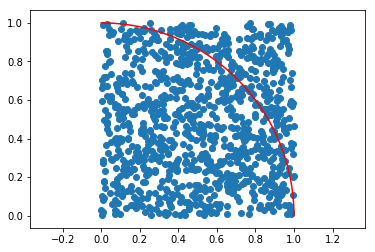

In [22]:
plt.scatter(xy[:,0], xy[:,1])
an = np.linspace(0, 0.5*np.pi, 50)
plt.plot(np.cos(an), np.sin(an), color='red')
plt.axis('equal')

plt.show()

In [23]:
ratio = sum(is_in_circle) / n_sample
ratio*4, ratio*4 - np.pi

(3.1480000000000001, 0.0064073464102070155)

In [24]:
def computePiMC_Ver1(n_points=1000, m_repeat=100):
    vals = np.zeros(m_repeat)
    for k in range(0,m_repeat):
        xy = np.random.rand(n_points, 2)
        is_in_circle = (xy[:,0]*xy[:,0] + xy[:,1]*xy[:,1] < 1)
        vals[k] = sum(is_in_circle) / n_points * 4.0
    
    return( [np.mean(vals), np.std(vals)] )

In [25]:
print( computePiMC_Ver1() )
print( computePiMC_Ver1(n_points=2000) )
print( computePiMC_Ver1(n_points=4000) )

[3.1438000000000006, 0.055895259190739989]
[3.1451399999999992, 0.033264100769448177]
[3.1446499999999999, 0.023963044464341342]


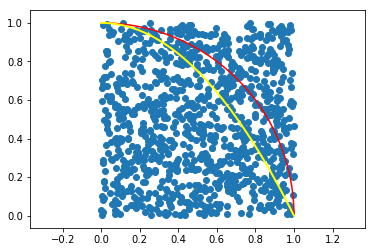

In [26]:
# Computing PI with Monte-Carlo 
plt.scatter(xy[:,0], xy[:,1])
an = np.linspace(0, 1, 50)
plt.plot(np.cos(0.5*np.pi*an), np.sin(0.5*np.pi*an), color='red')
plt.plot(an, 1-an**2, color='yellow', lw=2)
plt.axis('equal')
plt.show()

In [27]:
def computePiMC_Ver2(n_points=1000, m_repeat=100):
    vals = np.zeros(m_repeat)
    for k in range(0,m_repeat):
        xy = np.random.rand(n_points, 2)
        is_in_circle = (xy[:,0]**2 + xy[:,1]**2 < 1)
        is_in_parabola = (xy[:,1] + xy[:,0]**2 < 1)

        error_control = sum(is_in_parabola) / n_points - 2/3
        vals[k] = ( sum(is_in_circle) / n_points - error_control ) * 4.0 
    
    return( [np.mean(vals), np.std(vals)] )

In [28]:
# We get slighter better result (i.e., smaller std)
print( computePiMC_Ver2() )
print( computePiMC_Ver2(n_points=2000) )
print( computePiMC_Ver2(n_points=4000) )

[3.1463466666666666, 0.037222272902121385]
[3.1459666666666664, 0.030316167303932103]
[3.1407866666666671, 0.018935828474085842]
